In [ ]:
import pandas as pd #storing the dataset
import numpy as np #performing functions on arrays
import os #to manage some files
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import sys; sys.path.append('..')
from aips import num2str, vec2str, tokenize
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [ ]:
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
df=df.drop(columns='Id')#delete a column id

In [ ]:
df.describe() #stats

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

PRE-PROCESSING


In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Visualising


<Axes: >

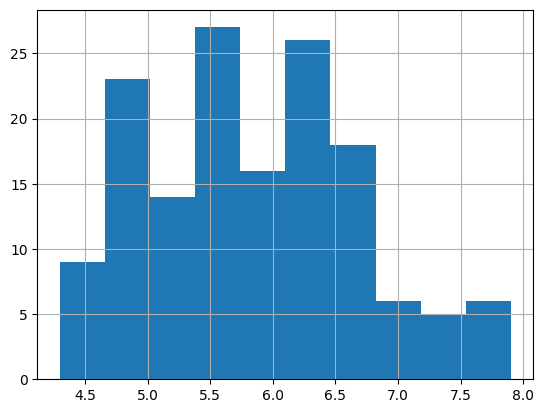

In [ ]:
df['SepalLengthCm'].hist()#has normaldistribution , seen from curve , model can easily learn through the data


<Axes: >

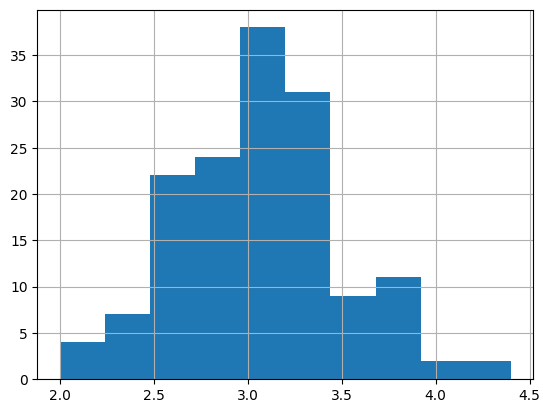

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

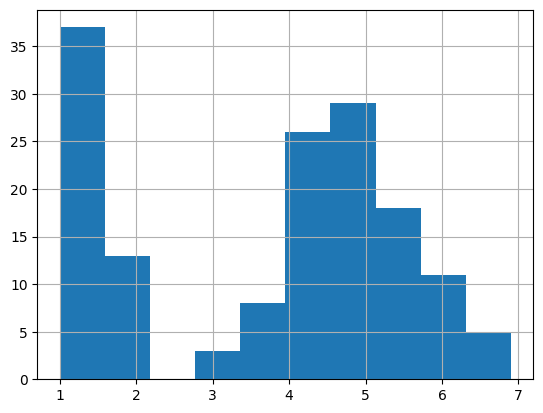

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

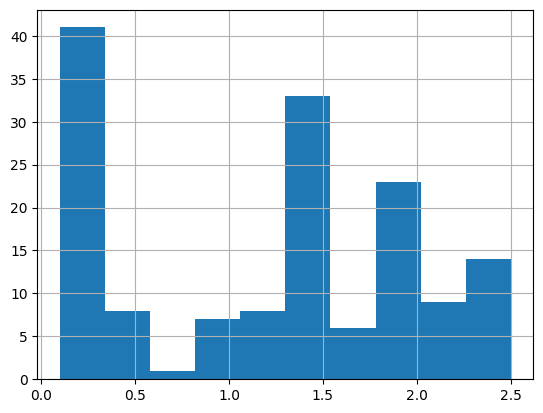

In [ ]:
df['PetalWidthCm'].hist()

Scatter plot


In [ ]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor', 'Iris-virginica']

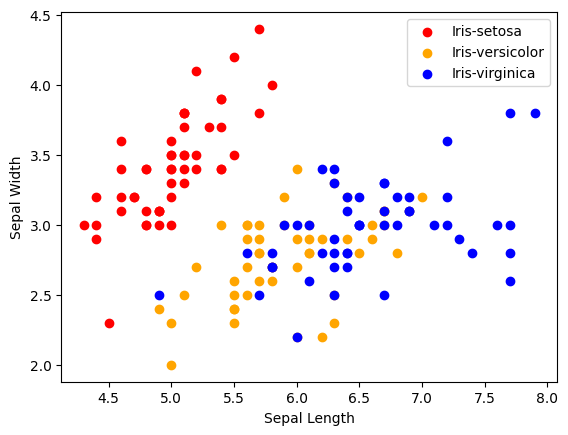

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

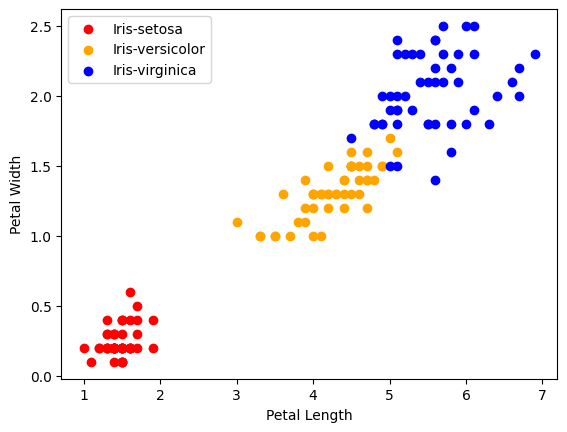

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

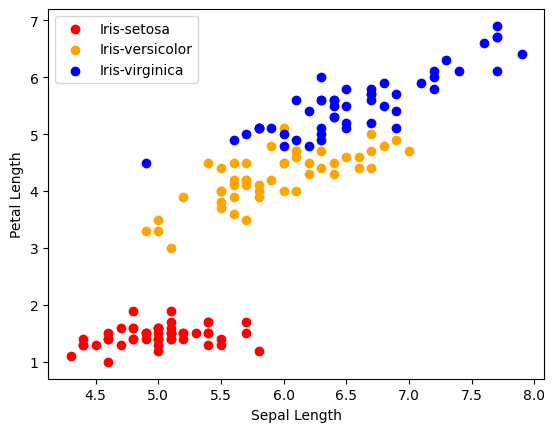

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

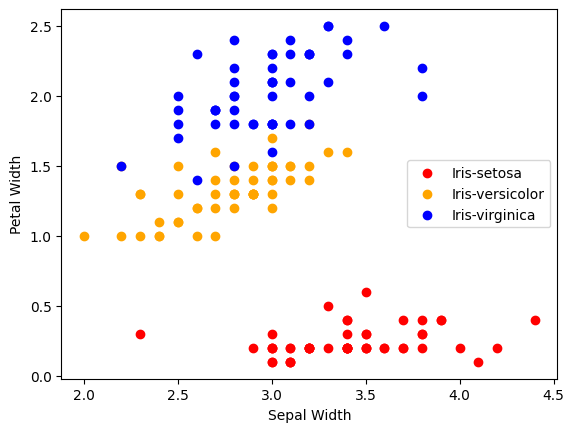

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [ ]:
fig = px.scatter(df, x="SepalWidthCm", y="SepalLengthCm", color="Species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()


In [ ]:
fig = px.scatter_matrix(df, dimensions=["SepalWidthCm", "SepalLengthCm", "PetalWidthCm", "PetalLengthCm"], color="Species")
fig.show()

In [ ]:
fig = px.area(df, x="SepalWidthCm", y="SepalLengthCm", color="Species", line_group="Species")
fig.show()

In [ ]:
fig = px.density_contour(df, x="SepalWidthCm", y="SepalLengthCm")
fig.show()


In [ ]:
fig = px.density_heatmap(df, x="SepalWidthCm", y="PetalLengthCm", z="SepalLengthCm", histfunc="avg")
fig.show()

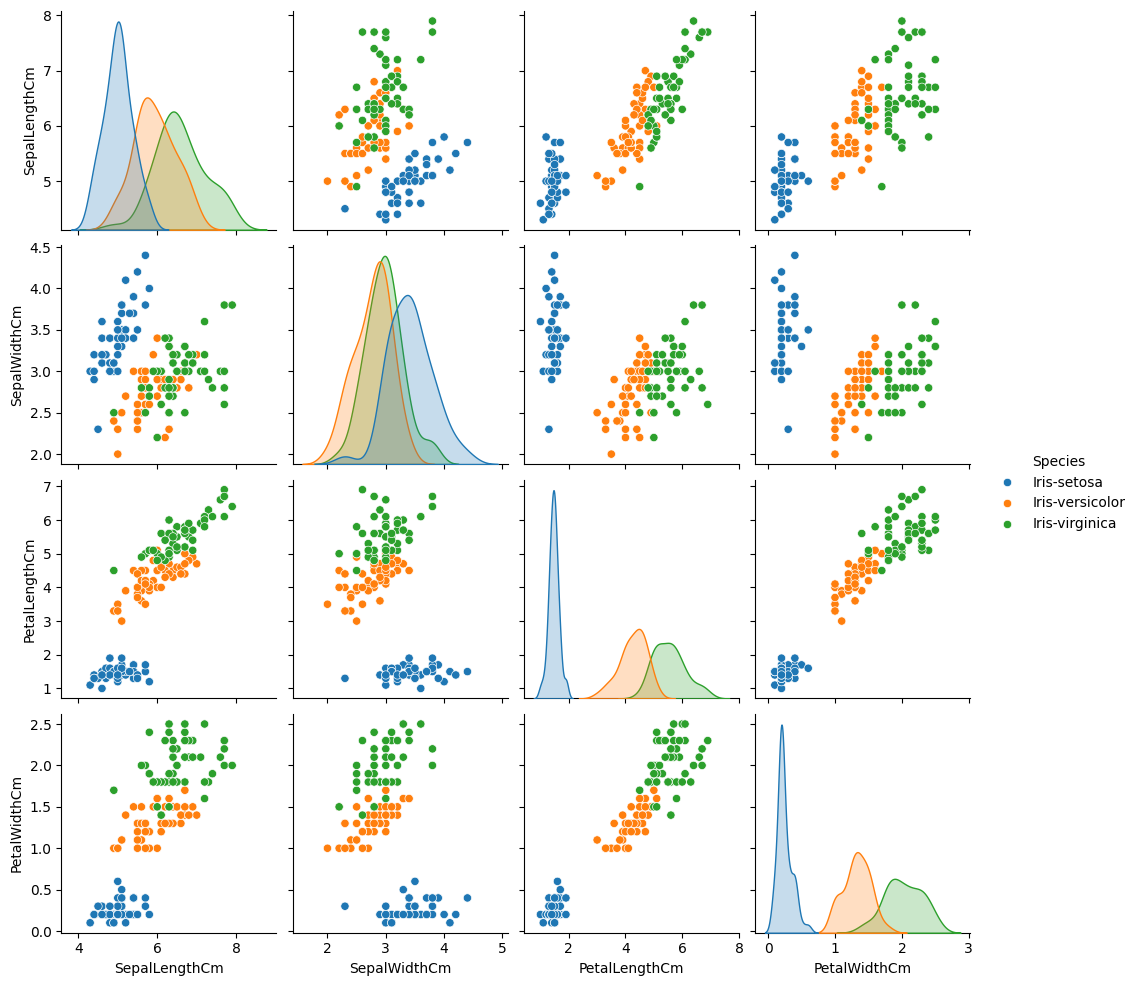

In [ ]:
sns.pairplot(data=df, hue="Species")

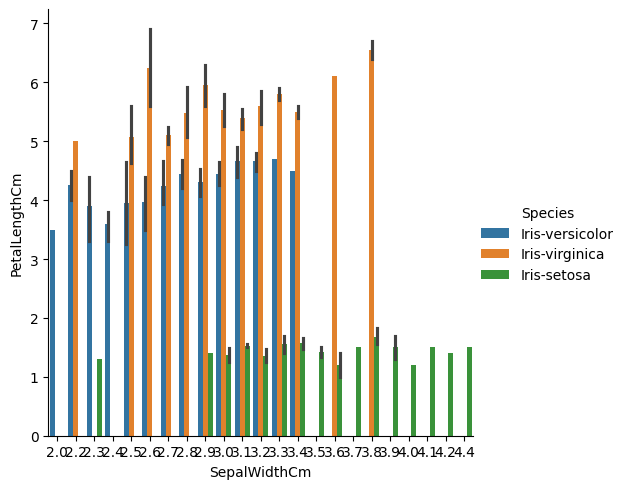

In [ ]:
sns.catplot(data=df, kind="bar", x="SepalWidthCm", y="PetalLengthCm", hue="Species")

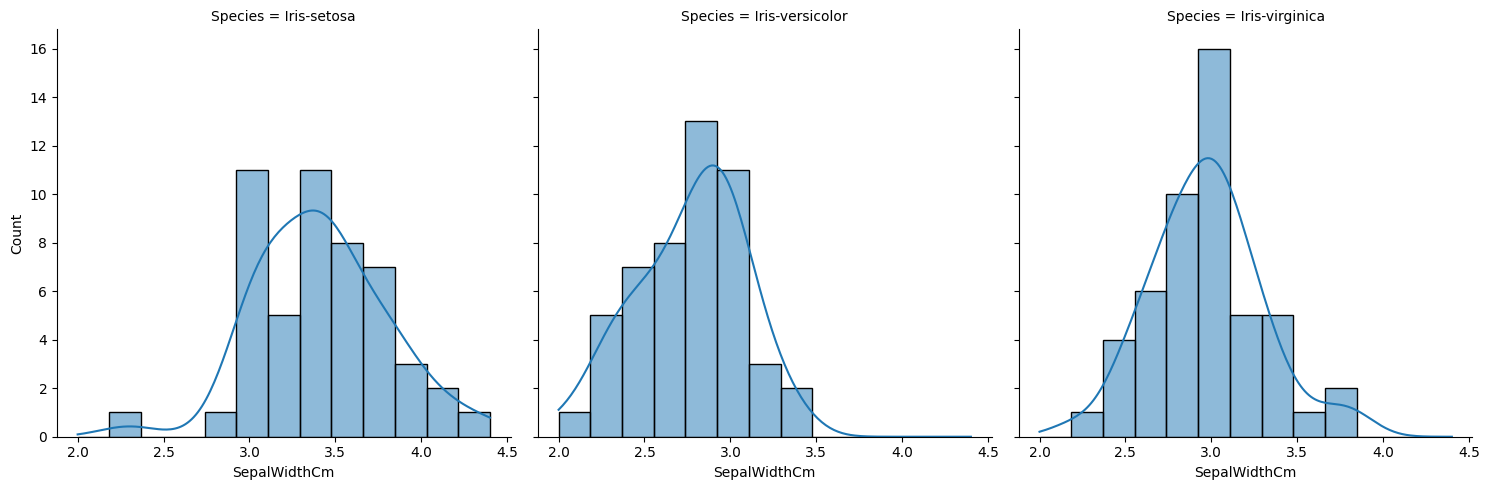

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sns.displot(data=df, x="SepalWidthCm", col="Species", kde=True)

In [ ]:
fig = px.scatter_matrix(df)
fig.show()

In [ ]:
fig = px.scatter_3d(df, x="SepalWidthCm", y="PetalLengthCm", z='PetalWidthCm',
              color='Species')
fig.show()


CoRelation Matrix


In [ ]:
corr =df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

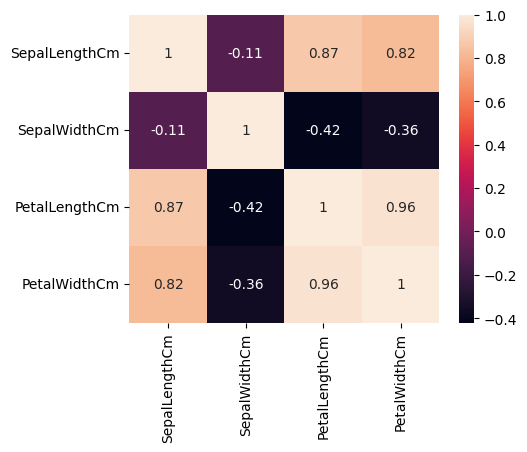

In [ ]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [ ]:
df['Species']=le.fit_transform(df['Species'])

In [ ]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

Model Train


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)#25 percent test data , 70 percent train data

In [ ]:
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression()
lrmodel.fit(x_train,y_train)#input,output

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
print(lrmodel.score(x_test, y_test))

0.9210526315789473


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 94.73684210526315


In [ ]:
import joblib
import numpy as np

def predict_iris(features, model):
    features = np.array(features).reshape(1, -1)
    predictions = model.predict(features)
    return predictions

# Mapping of encoded labels to original species names
label_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

sl = float(input("Enter Sepal Length value: "))
sw = float(input("Enter Sepal Width value: "))
pl = float(input("Enter Petal Length value: "))
pw = float(input("Enter Petal Width value: "))


input_features = [sl, sw, pl, pw]

y_out = predict_iris(input_features, model)

predicted_label = label_map[y_out[0]]
print("Predicted species:", predicted_label)


Enter Sepal Length value: 5.6
Enter Sepal Width value: 8.5
Enter Petal Length value: 3
Enter Petal Width value: 12
Predicted species: Iris-virginica
